In [2]:
import pandas as pd
import numpy as np

In [10]:
data=pd.read_csv('/content/CoronaTweetsSentimentAnalysis.csv')

In [11]:
data.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive
5,6,44971,NaN,05-03-2020,That's about a week from now. A bit optimistic...,Positive
6,7,44973,Malta,05-03-2020,#CoronaVirus #COVID_19 People are starting to ...,Negative
7,8,44978,"Wayne County, MI",07-03-2020,Alright yall I hope our Melanin prevails but ...,Positive
8,9,44979,"Bondi Beach, Sydney",07-03-2020,When your usual grocery shopping @woolworths t...,Negative
9,10,44980,NaN,07-03-2020,Coronavirus panic spreads: Costco is pulling f...,Negative


In [12]:
data.isnull().sum()

UserName           0
ScreenName         0
Location         452
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

percentage of review types:

Negative    52.36
Positive    47.64
Name: Sentiment, dtype: float64


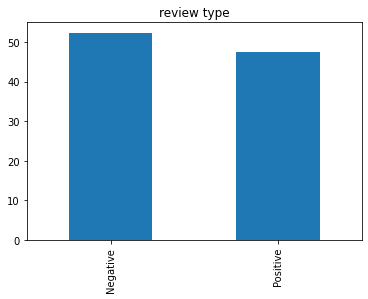

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('percentage of review types:\n')
print(round(data.Sentiment.value_counts(normalize=True)*100,2))
round(data.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('review type')
plt.show()

In [14]:
data.drop(['TweetAt','ScreenName','UserName','Location'],axis=1,inplace=True)

In [15]:
data.head(10)

,OriginalTweet,Sentiment
0,When I couldn't find hand sanitizer at Fred Me...,Positive
1,#Panic buying hits #NewYork City as anxious sh...,Negative
2,Voting in the age of #coronavirus = hand sanit...,Positive
3,Best quality couches at unbelievably low price...,Positive
4,While we were busy watching election returns a...,Positive
5,That's about a week from now. A bit optimistic...,Positive
6,#CoronaVirus #COVID_19 People are starting to ...,Negative
7,Alright yall I hope our Melanin prevails but ...,Positive
8,When your usual grocery shopping @woolworths t...,Negative
9,Coronavirus panic spreads: Costco is pulling f...,Negative


In [16]:
data.shape

(1988, 2)

In [17]:
data['OriginalTweet'][572]

'COVID-19 is getting out of hand now, rumours of the government shutting down the entire continent gathering pace &amp; food stock is disappearing from the markets.'

In [18]:
import re
import string

def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '',text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text=re.sub('\w*\d\w*', '',text)
    return text
cleaned = lambda x: clean(x)

In [19]:
data['description']=pd.DataFrame(data.OriginalTweet.apply(cleaned))

In [20]:
data.sample(10)

,OriginalTweet,Sentiment,description
497,The businessDEPOT team shares what they would ...,Positive,the businessdepot team shares what they would ...
1230,@HyVee any plans to reconsider or postpone the...,Negative,hyvee any plans to reconsider or postpone the ...
1429,Scenes from grocery store battle ground part 5...,Negative,scenes from grocery store battle ground part \...
309,There is a lot of stress out there.\r\r\nAs I ...,Negative,there is a lot of stress out there\r\r\nas i d...
1262,Decided to visit the grocery store:\r\r\nNo ba...,Negative,decided to visit the grocery store\r\r\nno ban...
311,Nothing like a panic in the supermarket. My lo...,Negative,nothing like a panic in the supermarket my lor...
322,Shops have now sold out of nappies and baby fo...,Negative,shops have now sold out of nappies and baby fo...
858,People are understandably worried about the sp...,Negative,people are understandably worried about the sp...
1935,Coronavirus is taking over all aspects of the ...,Positive,coronavirus is taking over all aspects of the ...
1662,I find it fascinating the things people choose...,Negative,i find it fascinating the things people choose...


In [21]:
def clean2(text):
    text = re.sub('[''""...]' , '', text)
    text = re.sub('\n', '', text)
    return text
cleaned2 = lambda x: clean2(x)

In [22]:
data['tweet'] = pd.DataFrame(data.description.apply(cleaned2))

In [23]:
data.head()

,OriginalTweet,Sentiment,description,tweet
0,When I couldn't find hand sanitizer at Fred Me...,Positive,when i couldnt find hand sanitizer at fred mey...,when i couldnt find hand sanitizer at fred mey...
1,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious shop...,panic buying hits newyork city as anxious shop...
2,Voting in the age of #coronavirus = hand sanit...,Positive,voting in the age of coronavirus hand sanitiz...,voting in the age of coronavirus hand sanitiz...
3,Best quality couches at unbelievably low price...,Positive,best quality couches at unbelievably low price...,best quality couches at unbelievably low price...
4,While we were busy watching election returns a...,Positive,while we were busy watching election returns a...,while we were busy watching election returns a...


In [24]:
data.drop(['description'],axis=1,inplace=True)

In [25]:
data['result'] = pd.factorize(data.Sentiment)[0]

In [26]:
data.result.describe()

count    1988.000000
mean        0.523642
std         0.499566
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: result, dtype: float64

In [27]:
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [28]:
corpus = []
for i in range (0,len(data.tweet)):
    Description = re.sub('[^a-zA-Z]'," ",data["tweet"][i])
    Description = Description.lower()
    Description = Description.split()
    pe=PorterStemmer()
    all_stopword=stopwords.words('english')
    type (all_stopword)
    all_stopword.remove("not")
    Description = [pe.stem(word) for word in Description if not word in set (all_stopword)]
    Description=" ".join(Description)
    corpus.append(Description)

In [29]:
np.array(corpus).shape

(1988,)

In [30]:
from sklearn.model_selection import train_test_split

x = corpus
y = data.result

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

print('xtrain :',len(xtrain))
print('xtest :',len(xtest))
print('ytrain :',len(ytrain))
print('ytest :',len(ytest))

xtrain : 1590
xtest : 398
ytrain : 1590
ytest : 398


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
clf=LogisticRegression(solver="liblinear",penalty = "l1")

from sklearn.pipeline import Pipeline

In [32]:
model= Pipeline([('vectorizer',tvec),('classifier',clf)])

model.fit(xtrain,ytrain)

from sklearn.metrics import confusion_matrix

predictions = model.predict(xtest)
confusion_matrix(predictions,ytest)


array([[ 93,  58],
       [ 95, 152]])

In [33]:
model.score(xtrain,ytrain)

0.6867924528301886

In [34]:
from sklearn.metrics import accuracy_score

print("Accuracy : " , accuracy_score(predictions,ytest))

Accuracy :  0.6155778894472361


In [35]:
example=["corona is a disaster it made our lives bad"]
result=model.predict(example)
if(result==0):
  print("Positive")
else:
  print("Negative")

Negative


In [36]:
from sklearn.naive_bayes import MultinomialNB 

model_naive = MultinomialNB() 
tvec2=TfidfVectorizer()

In [37]:
model2= Pipeline([('vectorizer',tvec2),('classifier',model_naive)])

model2.fit(xtrain,ytrain)


predictions = model2.predict(xtest)
confusion_matrix(predictions,ytest)

array([[ 79,  48],
       [109, 162]])

In [38]:
model2.score(xtrain,ytrain)

0.9364779874213837

In [39]:
from sklearn.metrics import accuracy_score

print("Accuracy : " , accuracy_score(predictions,ytest))

Accuracy :  0.6055276381909548


In [41]:
example=["So sad these days"]
result=model2.predict(example)
if(result==0):
  print("Positive")
else:
  print("Negative")

Negative
